<br> </br>
<font color='darkred' size = 7.5> <center>  <b> Quantitative strategies on high-frequency data </b> </center> </font>
<font color='darkred' size = 5> <center>  4. Constructing a strategy setup using different entry/exit techniques </center> </font>


# Exercises 4

Perform a similar analysis for two other symbols.

# Exercise 4.1

* Prepare a separate dataframe including close prices of two selected assets
* fill missing values with the last non-missing observation
* Assume you are excluding the first and last 10 minutes of the session (9:31-9:40 and 15:51-16:00) - delete the data for this period (place NAs in the data)

In [1]:
# place for solution of Exercise 4.1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
data_url = "http://coin.wne.uw.edu.pl/pwojcik/hfd/US_stocks.csv"

dataUSA = pd.read_csv(data_url,
                      parse_dates = ["timestamp"],
                      index_col = "timestamp")
dataUSA.head(2)


,open_AAPL,high_AAPL,low_AAPL,close_AAPL,volume_AAPL,open_META,high_META,low_META,close_META,volume_META,...,open_MA,high_MA,low_MA,close_MA,volume_MA,open_V,high_V,low_V,close_V,volume_V
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-01-02 09:31:00,248.3506,248.4105,247.4327,247.6023,1245220,588.7706,591.9455,588.1616,591.9156,209802.0,...,526.1993,526.1993,523.6041,524.7426,48309.0,316.7216,316.9708,316.1435,316.8013,122361.0
2025-01-02 09:32:00,247.6672,248.5202,246.7044,247.0636,463134,591.7708,591.9905,589.9987,591.6660,36859.0,...,525.0856,525.1453,523.6538,523.6538,7293.0,316.9658,317.0405,316.0440,316.4724,17787.0


<Axes: xlabel='timestamp'>

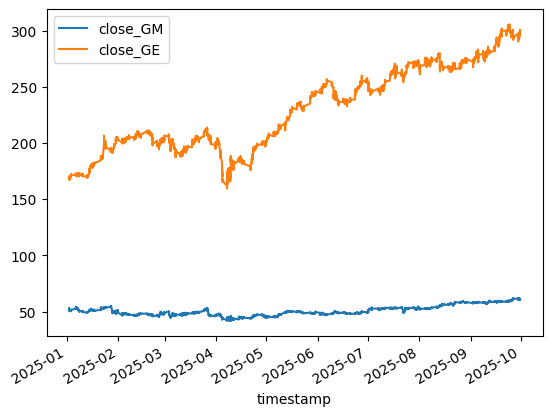

In [3]:
# 4.1.1
dataUSA_close = dataUSA.filter(like = "close_").copy()
# 4.1.2
# fill missing close prices with the last non-missing value
dataUSA_close.ffill(inplace = True)

# and create a separate dataframe with just close prices of APPL and META
dataUSA_GM_GE = dataUSA_close[['close_GM', 'close_GE']].copy()

dataUSA_GM_GE.plot()

In [4]:
# 4.1.3 Assuming : excluding the first and last 10 minutes of the session
# 4.1.3 Filling the delted data with nans
dataUSA_GM_GE = dataUSA_GM_GE.copy()
dataUSA_GM_GE.loc[dataUSA_GM_GE.between_time("09:31", "09:40").index] = np.nan
dataUSA_GM_GE.loc[dataUSA_GM_GE.between_time("15:51", "16:00").index] = np.nan


In [5]:
# CHECK 
dataUSA_GM_GE.between_time("15:51", "16:00").head(20)

,close_GM,close_GE
timestamp,,
2025-01-02 15:51:00,NaN,NaN
2025-01-02 15:52:00,NaN,NaN
2025-01-02 15:53:00,NaN,NaN
2025-01-02 15:54:00,NaN,NaN
2025-01-02 15:55:00,NaN,NaN
2025-01-02 15:56:00,NaN,NaN
2025-01-02 15:57:00,NaN,NaN
2025-01-02 15:58:00,NaN,NaN
2025-01-02 15:59:00,NaN,NaN


array([[<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>]], dtype=object)

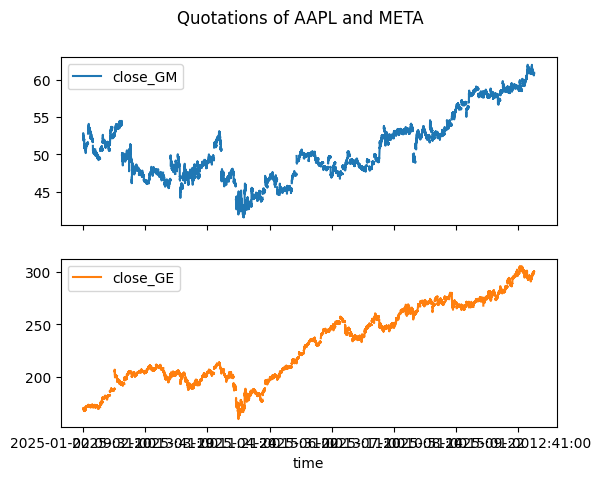

In [6]:
dataUSA_GM_GE_plot = dataUSA_GM_GE.copy()

dataUSA_GM_GE_plot['time'] = dataUSA_GM_GE_plot.index.astype(str)

# Reset the index so that 'time' is a column
dataUSA_GM_GE_plot = dataUSA_GM_GE_plot.reset_index(drop = True)

# Set time as the X-axis and plot the charts
dataUSA_GM_GE_plot.plot(
    x = 'time',
    subplots = True,
    layout = (2, 1),
    title = "Quotations of AAPL and META"
)

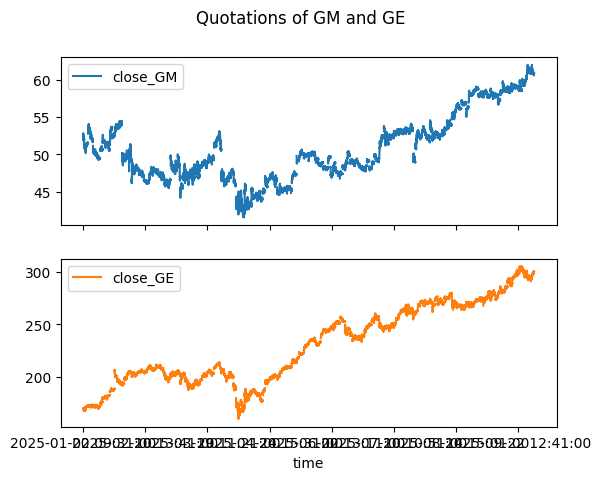

In [7]:
# Lets see the effect on the plot
dataUSA_GM_GE_plot = dataUSA_GM_GE[['close_GM', 'close_GE']].copy()

dataUSA_GM_GE_plot['time'] = dataUSA_GM_GE_plot.index.astype(str)

# Reset the index so that 'time' is a column
dataUSA_GM_GE_plot = dataUSA_GM_GE_plot.reset_index(drop = True)

# Set time as the X-axis and plot the charts
dataUSA_GM_GE_plot.plot(
    x = 'time',
    subplots = True,
    layout = (2, 1),
    title = "Quotations of GM and GE"
)

plt.show()

# Exercise 4.2

Prepare a strategy framework based on the intersection of price and a single moving average (SMA or EMA).

* Choose your own parameters.
* Plot the results of your calculations on a chart (for the first 5 days).

In [8]:
# place for solution of Exercise 4.2
# Create EMA for the Strategy Framework

dataUSA_GM_GE['close_GM_EMA10'] = dataUSA_GM_GE['close_GM'].ewm(span = 10, min_periods = 5).mean()
dataUSA_GM_GE['close_GM_EMA10'] = dataUSA_GM_GE['close_GM_EMA10'].where(~dataUSA_GM_GE['close_GM'].isna(), np.nan)

dataUSA_GM_GE.iloc[-20:-10]


,close_GM,close_GE,close_GM_EMA10
timestamp,,,
2025-09-30 15:41:00,60.790,299.9550,60.783218
2025-09-30 15:42:00,60.775,299.9900,60.781724
2025-09-30 15:43:00,60.765,299.9450,60.778683
2025-09-30 15:44:00,60.810,300.3850,60.784377
2025-09-30 15:45:00,60.785,300.2703,60.784490
2025-09-30 15:46:00,60.765,300.2850,60.780947
2025-09-30 15:47:00,60.795,300.7200,60.783502
2025-09-30 15:48:00,60.780,300.6700,60.782865
2025-09-30 15:49:00,60.840,300.6050,60.793253


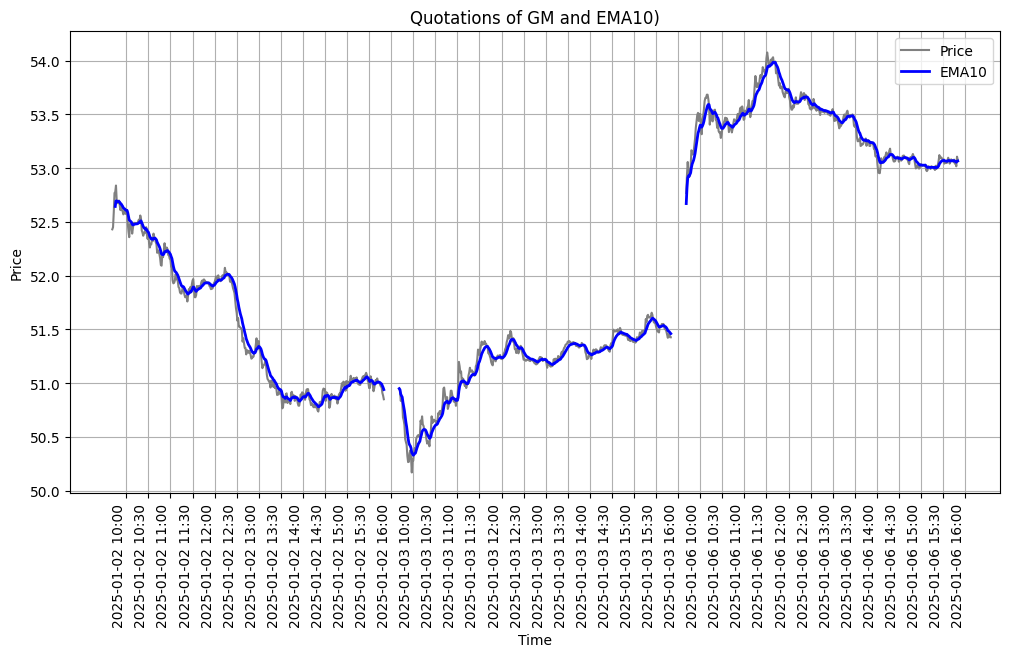

In [9]:
dataUSA_GM_GE_plot = dataUSA_GM_GE[['close_GM','close_GM_EMA10',]].copy()

dataUSA_GM_GE_plot['time'] = dataUSA_GM_GE_plot.index
end_date = dataUSA_GM_GE_plot.index.min() + pd.Timedelta(days = 5)
dataUSA_GM_GE_plot = dataUSA_GM_GE_plot.loc[:end_date]

# DEBUGGED 
dataUSA_GM_GE_plot = dataUSA_GM_GE_plot.reset_index(drop=True)

plt.figure(figsize = (12, 6))
plt.plot(dataUSA_GM_GE_plot.index, 
         dataUSA_GM_GE_plot['close_GM'], 
         label = 'Price', 
         color='gray')
plt.plot(dataUSA_GM_GE_plot.index, 
         dataUSA_GM_GE_plot['close_GM_EMA10'], 
         label = 'EMA10', 
         color = 'blue',  
         linewidth = 2)

tick_mask = dataUSA_GM_GE_plot['time'].dt.minute % 30 == 0
xticks = dataUSA_GM_GE_plot.index[tick_mask]
xticklabels = dataUSA_GM_GE_plot['time'][tick_mask].dt.strftime('%Y-%m-%d %H:%M')
plt.xticks(ticks = xticks, labels = xticklabels, rotation = 90, ha = 'right')

plt.title("Quotations of GM and EMA10)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Based on the visual analysis of the plot. the strategy looks reasonable. No need to tune the parameters further.

# Exercise 4.3

Prepare a strategy framework based on the intersection of two moving **medians**.

* Choose your own parameters.
* Plot the calculation results on a chart (for the first 5 days).

In [10]:
# place for solution of Exercise 4.3

dataUSA_GM_GE['med_short'] = dataUSA_GM_GE['close_GM'].rolling(window=5, min_periods=3).median()
dataUSA_GM_GE['med_long']  = dataUSA_GM_GE['close_GM'].rolling(window=20, min_periods=10).median()

# remove values where price is missing
dataUSA_GM_GE['med_short'] = dataUSA_GM_GE['med_short'].where(~dataUSA_GM_GE['close_GM'].isna(), np.nan)
dataUSA_GM_GE['med_long']  = dataUSA_GM_GE['med_long'].where(~dataUSA_GM_GE['close_GM'].isna(), np.nan)


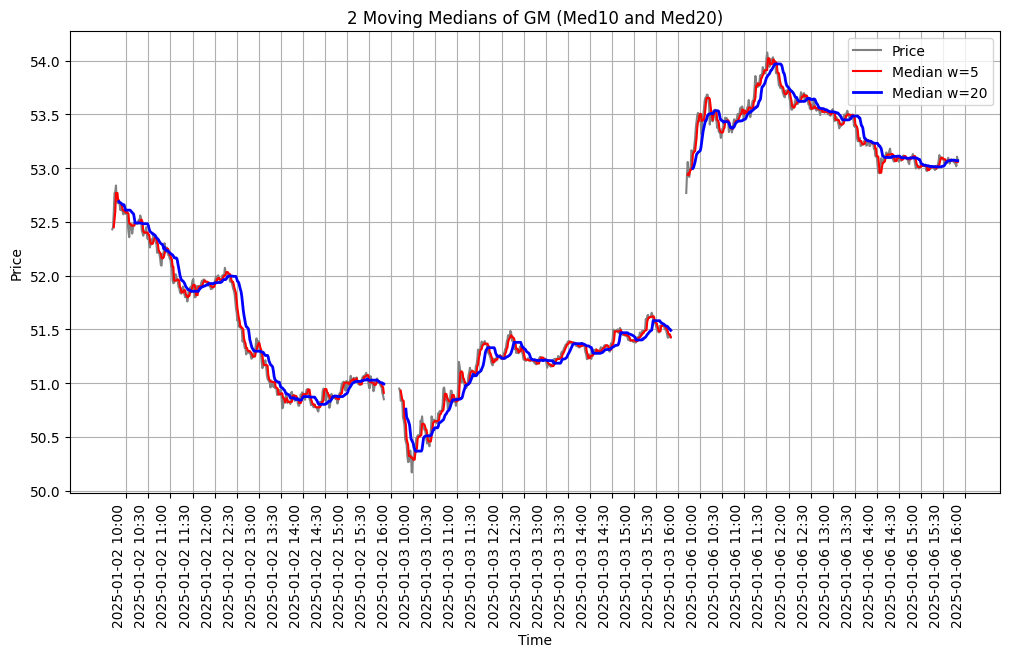

In [11]:
dataUSA_GM_GE_plot = dataUSA_GM_GE[['close_GM','med_short', 'med_long']].copy()

dataUSA_GM_GE_plot['time'] = dataUSA_GM_GE_plot.index
end_date = dataUSA_GM_GE_plot.index.min() + pd.Timedelta(days = 5)
dataUSA_GM_GE_plot = dataUSA_GM_GE_plot.loc[:end_date]

# DEBUGGED 
dataUSA_GM_GE_plot = dataUSA_GM_GE_plot.reset_index(drop=True)

plt.figure(figsize = (12, 6))
plt.plot(dataUSA_GM_GE_plot.index, 
         dataUSA_GM_GE_plot['close_GM'], 
         label = 'Price', 
         color='grey')
plt.plot(dataUSA_GM_GE_plot.index, 
         dataUSA_GM_GE_plot['med_short'], 
         label = 'Median w=5', 
         color='red')
plt.plot(dataUSA_GM_GE_plot.index, 
         dataUSA_GM_GE_plot['med_long'], 
         label = 'Median w=20', 
         color = 'blue',  
         linewidth = 2)

tick_mask = dataUSA_GM_GE_plot['time'].dt.minute % 30 == 0
xticks = dataUSA_GM_GE_plot.index[tick_mask]
xticklabels = dataUSA_GM_GE_plot['time'][tick_mask].dt.strftime('%Y-%m-%d %H:%M')
plt.xticks(ticks = xticks, labels = xticklabels, rotation = 90, ha = 'right')

plt.title("2 Moving Medians of GM (Med10 and Med20)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

For obvious reasons the median with the shorter window is closer to the price. The point of intersection between the med20 and med10 does help identify a trend change. For example, at 12:00 06-01-2015. The intersection was followed by a change in the trend. 
This suggests the "intersection strategy" could be considered as a crude trend-change heuristic.


# Exercise 4.4

Prepare a strategy framework based on a volatility breakout model

* Choose a volatility measure other than standard deviation and your own parameter values
* Plot the calculation results on a chart (for the first 5 days).

In [12]:
# For the measure of volatility, we use Median Absolute Deviation.
#  de-median the prices for a window and compute rolling median of the remainder.

med = dataUSA_GM_GE['close_GM'].rolling(10, min_periods=5).median()
dataUSA_GM_GE['vol_mad10'] = (dataUSA_GM_GE['close_GM'] - med).abs().rolling(10, min_periods=5).median()



$$
\text{Upper Threshold} = \text{EMA}_{10} + m \times \text{MAD}_{10}
$$
$$
\text{Lower Threshold} = \text{EMA}_{10} - m \times \text{MAD}_{10}
$$


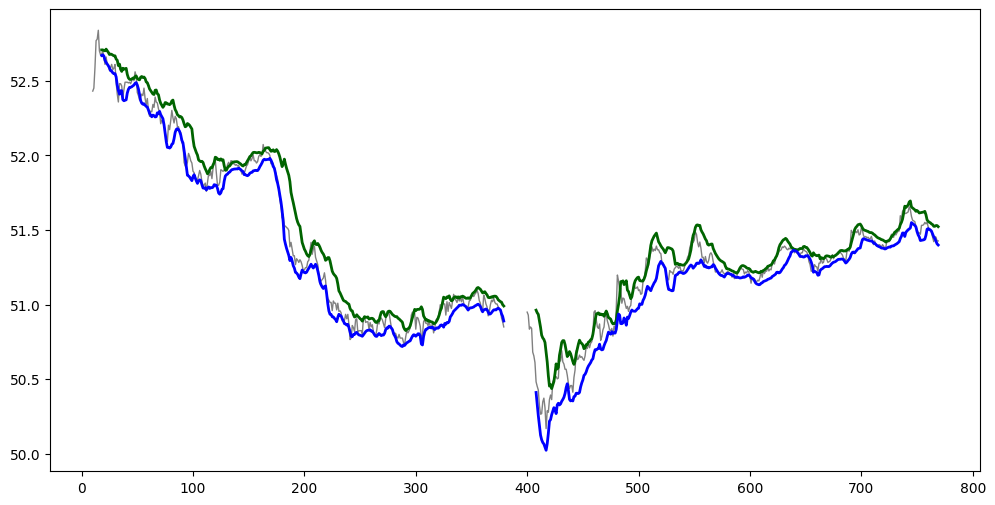

In [13]:
# Let's see the closing price and thresholds on the chart
# determined based on volatility
# EMA10+/-1.5*MAD10

# Select only the columns needed for the chart
dataUSA_GM_GE_plot = dataUSA_GM_GE[['close_GM',
                                            'close_GM_EMA10',
                                            'vol_mad10']].copy()

# Filter only the first 3 days
end_date = dataUSA_GM_GE_plot.index.min() + pd.Timedelta(days = 2)
dataUSA_GM_GE_plot = dataUSA_GM_GE_plot.loc[:end_date]
# Add a time column (index as datetime)g
dataUSA_GM_GE_plot['time'] = dataUSA_GM_GE_plot.index
# Reset the index so that 'time' is a column
dataUSA_GM_GE_plot = dataUSA_GM_GE_plot.reset_index(drop=True)

# We make a plot by observation number – so that there are no gaps between sessions
plt.figure(figsize = (12, 6))
plt.plot(dataUSA_GM_GE_plot.index, 
         dataUSA_GM_GE_plot['close_GM'], 
         color = 'gray',  
         linewidth = 1)
plt.plot(dataUSA_GM_GE_plot.index, 
         dataUSA_GM_GE_plot['close_GM_EMA10'] + 1.5 * dataUSA_GM_GE_plot['vol_mad10'], 
         color = 'darkgreen',  
         linewidth = 2)
plt.plot(dataUSA_GM_GE_plot.index, 
         dataUSA_GM_GE_plot['close_GM_EMA10'] - 1.5 * dataUSA_GM_GE_plot['vol_mad10'],
         color = 'blue',  
         linewidth = 2)


# Exercise 4.5

Save the dataframe with all calculated measures for later exercises.

In [17]:
# place for solution of Exercise 4.5
dataUSA_GM_GE.to_pickle("output/dataUSA_GM_GE.pkl")
